A notebook is probably overkill for this...

Spotter data can only be downloaded 2 months at a time. So this notebook merges files into one.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import glob

# SPOT 1759


In [2]:
files=glob.glob('data/old_SPOT-1759/SPOT-1759*')
files.sort()
files.insert(0, 'data/SPOT-1759_2022-04-22_2023-02-20_download.csv')
print(files)

out='data/SPOT-1759_2022-04-22_2023-10-25_download.csv'

['data/SPOT-1759_2022-04-22_2023-02-20_download.csv', 'data/old_SPOT-1759/SPOT-1759_2022-10-11_2022-10-24_download.csv', 'data/old_SPOT-1759/SPOT-1759_2022-10-22_2022-12-20_download.csv', 'data/old_SPOT-1759/SPOT-1759_2022-12-19_2023-02-14_download.csv', 'data/old_SPOT-1759/SPOT-1759_2023-02-13_2023-02-22_download.csv', 'data/old_SPOT-1759/SPOT-1759_2023-02-19_2023-04-17_download.csv', 'data/old_SPOT-1759/SPOT-1759_2023-04-15_2023-06-13_download.csv', 'data/old_SPOT-1759/SPOT-1759_2023-06-11_2023-06-25_download.csv', 'data/old_SPOT-1759/SPOT-1759_2023-06-23_2023-08-20_download.csv', 'data/old_SPOT-1759/SPOT-1759_2023-08-17_2023-10-15_download.csv', 'data/old_SPOT-1759/SPOT-1759_2023-10-12_2023-10-26_download.csv']


/home/soontiensn/miniconda-new/envs/develop/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3397: DtypeWarning: Columns (381) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


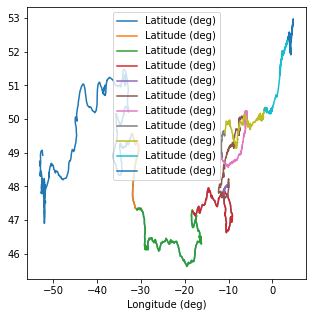

In [3]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ds=[]
for f in files:
    d = pd.read_csv(f)
    ds.insert(0,d)
    d.plot(x='Longitude (deg)', y='Latitude (deg)',ax=ax)

In [4]:
dnew=pd.concat(ds, ignore_index=True)
dnew

,Battery Voltage (V),Power (W),Humidity (%rel),Epoch Time,Significant Wave Height (m),Peak Period (s),Mean Period (s),Peak Direction (deg),Peak Directional Spread (deg),Mean Direction (deg),...,Partition1 End Frequency (hz),Partition1 Significant Wave Height (m),Partition1 Mean Period (s),Partition1 Mean Direction (deg),Partition1 Mean Directional Spread (deg),Mean Barometric Pressure (hPa),Processing Source,Unnamed: 0,Unnamed: 0.1,Time
0,3.90,0.09,77.6,1697705638,0.08,20.48,7.40,321.962,71.974,297.657,...,-,-,-,-,-,-,embedded,NaN,NaN,NaN
1,3.90,0.09,77.6,1697703838,0.16,17.06,10.00,246.514,73.417,271.809,...,-,-,-,-,-,-,embedded,NaN,NaN,NaN
2,3.90,-0.27,75.2,1697702142,0.17,34.12,11.84,2.125,57.248,0.286,...,-,-,-,-,-,-,embedded,NaN,NaN,NaN
3,3.90,-0.27,75.2,1697700342,0.49,17.06,14.10,278.499,73.733,344.558,...,-,-,-,-,-,-,embedded,NaN,NaN,NaN
4,3.90,-0.21,75.2,1697694692,0.61,34.12,18.32,336.765,62.430,332.740,...,-,-,-,-,-,-,embedded,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33197,3.90,1.98,13.6,1650735109,1.70,6.02,5.30,156.350,21.679,139.467,...,-,-,-,-,-,-,NaN,14551.0,8295.0,2022-04-23 17:31:49
33198,3.93,4.12,13.6,1650733309,1.79,6.02,5.34,156.922,23.937,144.293,...,-,-,-,-,-,-,NaN,14552.0,8296.0,2022-04-23 17:01:49
33199,3.93,4.12,13.6,1650731509,1.86,6.02,5.32,147.496,21.502,139.980,...,-,-,-,-,-,-,NaN,14553.0,8297.0,2022-04-23 16:31:49
33200,3.76,1.43,13.6,1650729709,1.72,6.02,5.38,147.923,23.647,138.139,...,-,-,-,-,-,-,NaN,14554.0,8298.0,2022-04-23 16:01:49


In [5]:
dnew.drop_duplicates(inplace=True, ignore_index=True, subset='Epoch Time')

<AxesSubplot:xlabel='Longitude (deg)'>

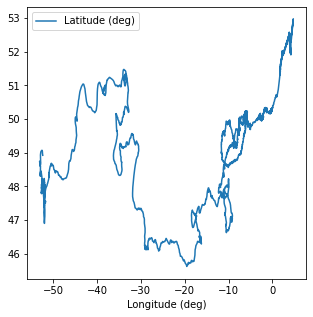

In [6]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
dnew.plot(x='Longitude (deg)', y='Latitude (deg)',ax=ax)

In [7]:
dnew['Time'] = pd.to_datetime(dnew['Epoch Time'],unit='s')

In [8]:
dnew.to_csv(out)